<a href="https://colab.research.google.com/github/unihong/MS-AI-School/blob/main/20230720_04_BRIEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

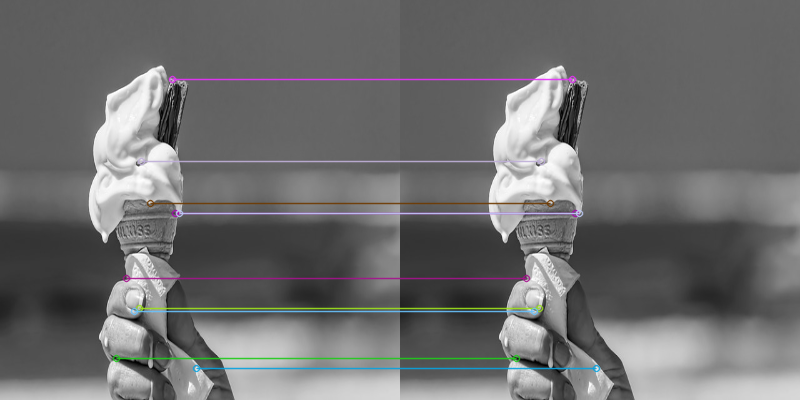

In [3]:
import cv2
from google.colab.patches import cv2_imshow

# image load
image1 = cv2.imread('icecream.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('icecream.jpg', cv2.IMREAD_GRAYSCALE)

# image size
image1 = cv2.resize(image1, (400, 400))
image2 = cv2.resize(image2, (400, 400))

# ORB 객체 생성
orb = cv2.ORB_create()

# keypoint, descriptors
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# BRISK 디스크럽트 매칭
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(descriptors1, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 상위 N개의 매칭 결과 시각화
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2,
                                matches[:10], None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matched_image)

